In [1]:
import sys
import sklearn
from sklearn import metrics
import torchvision
import torchvision.transforms as transforms
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
import numpy as np
import torch
import torchvision
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import adjusted_rand_score

In [2]:
# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

In [3]:
# Reading labels
y_train = train_dataset.targets.numpy()
y_test = test_dataset.targets.numpy()

# Reading features
x_train = train_dataset.data.numpy()
x_test = test_dataset.data.numpy()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Training Data: (60000, 28, 28)
Training Labels: (60000,)


In [14]:
np.max(x_train)

255

In [4]:
# Increase dimensions by 4 times in x and y directions
x_train = np.repeat(np.repeat(x_train, 4, axis=1), 4, axis=2)
x_test = np.repeat(np.repeat(x_test, 4, axis=1), 4, axis=2)

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Training Data: (60000, 112, 112)
Training Labels: (60000,)


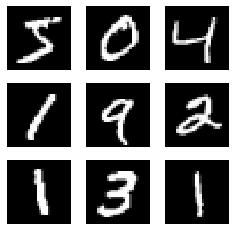

In [5]:
# python magic function
get_ipython().run_line_magic('matplotlib', 'inline')


# create figure with 3x3 subplots using matplotlib.pyplot
fig, axs = plt.subplots(3, 3, figsize=(4,4))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    #ax.set_title('Number {}'.format(y_train[i]))

# display the figure
fig.show()

# preprocessing the images
# convert each image to 1 dimensional array
X_train = x_train.reshape(len(x_train), -1)
X_test = x_test.reshape(len(x_test), -1)

# normalize the data to 0 - 1
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.

In [12]:
# List of clustering algorithms
clustering_algorithms = [
    ('KMeans', MiniBatchKMeans(n_clusters=256)),
    #('Agglomerative', AgglomerativeClustering(n_clusters=10)),
    #('DBSCAN', DBSCAN(eps=0.5, min_samples=5)),
    #('GMM', GaussianMixture(n_components=10))
]

# Iterate over each clustering algorithm
for name, algorithm in clustering_algorithms:
    print('Clustering Algorithm:', name)
    
    # Fit the model to the training data
    algorithm.fit(X_train)
    
    # Predict cluster labels for training and testing data
    train_clusters = algorithm.labels_
    test_clusters = algorithm.predict(X_test)
    
    # Evaluate clustering performance using Adjusted Rand Index (ARI)
    ari_train = adjusted_rand_score(y_train, train_clusters)
    ari_test = adjusted_rand_score(y_test, test_clusters)
    print(f"Adjusted Rand Index (ARI) - Training Set: {ari_train}")
    print(f"Adjusted Rand Index (ARI) - Test Set: {ari_test}")
    print('-' * 40)

Clustering Algorithm: KMeans


/home/stipendiater/mohamadi/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adjusted Rand Index (ARI) - Training Set: 0.06382090916709443
Adjusted Rand Index (ARI) - Test Set: 0.0673256741416886
----------------------------------------
